### MACD 的运用有如下基本原则：
1.DIF、DEA 均为正，DIF 向上突破 DEA，买入信号参考。
2.DIF、DEA 均为负，DIF 向下跌破 DEA，卖出信号参考。
3.DIF 线与 K 线发生背离，行情可能出现反转信号。
4.DIF、DEA 的值从正数变成负数，或者从负数变成正数并不是交易信号，因为它们落后
于市场。
简单地对应市场上的说法如下：
1. MACD 金叉： DIF 由下向上突破 DEA，为买入信号。
2. MACD 死叉： DIF 由上向下突破 DEA，为卖出信号。
针对这两条的说法，我需要提出 MACD 具有一定的滞后情况，即比市场的反应要慢。因
为 MACD 是一个中长期的指标，而不是个短期指标，不适合短期涨跌浮动太大的证券。

### 接下来，3 种说法更靠谱些：
3. MACD 柱状图为红，即 DIF 与 DEA 均为正值,即都在零轴线以上时，市场趋势属多头
市场，若此时 DIF 向上继续突破 DEA，即红色柱状越来越长，可作买入信号，该出手就出
手。
4. MACD 柱状图为绿，即 DIF 与 DEA 均为负值,即都在零轴线以下时，市场趋势属空头
市场，若此时 DIF 向下继续跌破 DEA，即绿色柱状越来越长，可作卖出信号，该割肉就割
肉。
5. 当 DEA 线与 K 线趋势发生背离时为反转信号。


In [3]:
import baostock as bs
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

In [4]:
    code = 'sh.601100'
    startdate = '2021-07-20'
    enddate = '2022-6-17'

In [5]:
    login_result = bs.login()
    print(login_result)
    # 获取股票日 K 线数据
    rs = bs.query_history_k_data(code, "date,code,close,tradeStatus", start_date=startdate, end_date=enddate,
                                 frequency="d", adjustflag="3")
    bs.logout()   
    # 打印结果集
    result_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        result_list.append(rs.get_row_data())
    df = pd.DataFrame(result_list, columns=rs.fields)
    

login success!
logout success!


In [6]:
df

,date,code,close,tradeStatus
0,2021-07-20,sh.601100,101.4000,1
1,2021-07-21,sh.601100,99.6500,1
2,2021-07-22,sh.601100,104.5000,1
3,2021-07-23,sh.601100,105.2500,1
4,2021-07-26,sh.601100,100.6600,1
...,...,...,...,...
215,2022-06-13,sh.601100,55.1400,1
216,2022-06-14,sh.601100,57.9000,1
217,2022-06-15,sh.601100,58.5600,1
218,2022-06-16,sh.601100,56.8900,1


In [7]:
    # 剔除停盘数据
    df2 = df[df['tradeStatus'] == '1']
    df2

,date,code,close,tradeStatus
0,2021-07-20,sh.601100,101.4000,1
1,2021-07-21,sh.601100,99.6500,1
2,2021-07-22,sh.601100,104.5000,1
3,2021-07-23,sh.601100,105.2500,1
4,2021-07-26,sh.601100,100.6600,1
...,...,...,...,...
215,2022-06-13,sh.601100,55.1400,1
216,2022-06-14,sh.601100,57.9000,1
217,2022-06-15,sh.601100,58.5600,1
218,2022-06-16,sh.601100,56.8900,1


In [8]:
    # 获取 dif,dea,hist，它们的数据类似是 tuple，且跟 df2 的 date 日期一一对应
    # 记住了 dif,dea,hist 前 33 个为 Nan，所以推荐用于计算的数据量一般为你所求日期之间数据量的3倍
    # 这里计算的 hist 就是 dif-dea,而很多证券商计算的 MACD=hist*2=(dif-dea)*2
    dif, dea, hist = ta.MACD(df2['close'].astype(float).values, fastperiod=12, slowperiod=26, signalperiod=9)

In [9]:
df4 = pd.DataFrame({'dif': dif, 'dea': dea, 'hist': hist}, index=df2['date'],
                       )
df4.head(34)

,dif,dea,hist
date,,,
2021-07-20,NaN,NaN,NaN
2021-07-21,NaN,NaN,NaN
2021-07-22,NaN,NaN,NaN
2021-07-23,NaN,NaN,NaN
2021-07-26,NaN,NaN,NaN
2021-07-27,NaN,NaN,NaN
2021-07-28,NaN,NaN,NaN
2021-07-29,NaN,NaN,NaN
2021-07-30,NaN,NaN,NaN


In [10]:
    df3 = pd.DataFrame({'dif': dif[33:], 'dea': dea[33:], 'hist': hist[33:]}, index=df2['date'][33:],
                       )
    df3

,dif,dea,hist
date,,,
2021-09-03,-2.398038,-1.625193,-0.772845
2021-09-06,-2.222895,-1.744733,-0.478161
2021-09-07,-2.124957,-1.820778,-0.304179
2021-09-08,-2.067087,-1.870040,-0.197047
2021-09-09,-2.046053,-1.905243,-0.140811
...,...,...,...
2022-06-13,1.482705,1.053949,0.428757
2022-06-14,1.775403,1.198239,0.577163
2022-06-15,2.037141,1.366020,0.671121


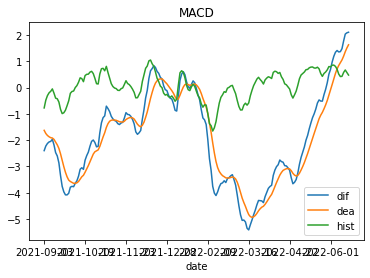

In [11]:
    df3.plot(title='MACD')
    plt.show()

In [12]:
df3.shape

(187, 3)

In [13]:
    # 寻找 MACD 金叉和死叉
    datenumber = int(df3.shape[0])
    datenumber

187

In [14]:
df3.iloc[0, 0],df3.iloc[0, 1],df3.iloc[0, 2],

(-2.3980378953177564, -1.6251930910350818, -0.7728448042826745)

In [15]:
    for i in range(datenumber - 1):
        if (df3.iloc[i, 0] <= df3.iloc[i, 1]) & (df3.iloc[i + 1, 0] >= df3.iloc[i + 1, 1]):
            print("MACD 金叉的日期：" + df3.index[i + 1])
        if (df3.iloc[i, 0] >= df3.iloc[i, 1]) & (df3.iloc[i + 1, 0] <= df3.iloc[i + 1, 1]):
            print("MACD 死叉的日期：" + df3.index[i + 1])    

MACD 金叉的日期：2021-10-11
MACD 死叉的日期：2021-11-12
MACD 金叉的日期：2021-11-22
MACD 死叉的日期：2021-11-29
MACD 金叉的日期：2021-12-07
MACD 死叉的日期：2021-12-23
MACD 金叉的日期：2022-01-07
MACD 死叉的日期：2022-01-17
MACD 金叉的日期：2022-01-19
MACD 死叉的日期：2022-01-24
MACD 金叉的日期：2022-02-28
MACD 死叉的日期：2022-03-03
MACD 金叉的日期：2022-03-21
MACD 死叉的日期：2022-04-22
MACD 金叉的日期：2022-04-29


In [16]:
def computeMACD(code, startdate, enddate):
    login_result = bs.login()
    print(login_result)
    # 获取股票日 K 线数据
    rs = bs.query_history_k_data(code, "date,code,close,tradeStatus", start_date=startdate, end_date=enddate,
                                 frequency="d", adjustflag="3")
    # 打印结果集
    result_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        result_list.append(rs.get_row_data())
    df = pd.DataFrame(result_list, columns=rs.fields)
    # 剔除停盘数据
    df2 = df[df['tradeStatus'] == '1']
    # 获取 dif,dea,hist，它们的数据类似是 tuple，且跟 df2 的 date 日期一一对应
    # 记住了 dif,dea,hist 前 33 个为 Nan，所以推荐用于计算的数据量一般为你所求日期之间数据量的3倍
    # 这里计算的 hist 就是 dif-dea,而很多证券商计算的 MACD=hist*2=(dif-dea)*2
    dif, dea, hist = ta.MACD(df2['close'].astype(float).values, fastperiod=12, slowperiod=26, signalperiod=9)
    df3 = pd.DataFrame({'dif': dif[33:], 'dea': dea[33:], 'hist': hist[33:]}, index=df2['date'][33:],
                       columns=['dif', 'dea', 'hist'])
    df3.plot(title='MACD')
    plt.show()

    # 寻找 MACD 金叉和死叉
    datenumber = int(df3.shape[0])
    for i in range(datenumber - 1):
        if (df3.iloc[i, 0] <= df3.iloc[i, 1]) & (df3.iloc[i + 1, 0] >= df3.iloc[i + 1, 1]):
            print("MACD 金叉的日期：" + df3.index[i + 1])
        if (df3.iloc[i, 0] >= df3.iloc[i, 1]) & (df3.iloc[i + 1, 0] <= df3.iloc[i + 1, 1]):
            print("MACD 死叉的日期：" + df3.index[i + 1])
    bs.logout()
    return (dif, dea, hist)

login success!


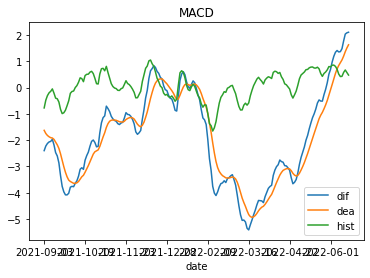

MACD 金叉的日期：2021-10-11
MACD 死叉的日期：2021-11-12
MACD 金叉的日期：2021-11-22
MACD 死叉的日期：2021-11-29
MACD 金叉的日期：2021-12-07
MACD 死叉的日期：2021-12-23
MACD 金叉的日期：2022-01-07
MACD 死叉的日期：2022-01-17
MACD 金叉的日期：2022-01-19
MACD 死叉的日期：2022-01-24
MACD 金叉的日期：2022-02-28
MACD 死叉的日期：2022-03-03
MACD 金叉的日期：2022-03-21
MACD 死叉的日期：2022-04-22
MACD 金叉的日期：2022-04-29
logout success!


In [17]:
if __name__ == '__main__':
    code = 'sh.601100'
    startdate = '2021-07-20'
    enddate = '2022-6-17'
    (dif, dea, hist) = computeMACD(code, startdate, enddate)

In [18]:
dif, dea, hist

(array([        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan, -2.3980379 , -2.22289468,
        -2.12495747, -2.06708692, -2.04605345, -1.96637134, -2.18067885,
        -2.4713109 , -2.59905611, -2.86257095, -3.34671995, -3.75570597,
        -3.96393484, -4.08110635, -4.08172669, -4.01974289, -3.78816307,
        -3.75660438, -3.7696384 , -3.63877173, -3.54582752, -3.36798431,
        -3.10491074, -3.0484866 , -3.1091402 , -2.76145696, -2.58761445,
        -2.45303568, -2.22870148, -2.04349717, -1.99396677, -2.08719546,
        -2.25371714, -2.23086413, -1.72246517, -1.3